# Import libraries

In [ ]:
import random
import numpy as np
import pandas as pd
from collections import Counter
from scipy.spatial import distance
import matplotlib.pyplot as plt

# KNN classifer class

In [ ]:
class KNNclassifer:
    def __init__(self, k, x_train, y_train):
        self.k = k
        self.x_train = x_train
        self.y_train = y_train

    """# KNN Step 1 (Calculate the distance using Euclidean distance)"""
    def distance_euc(self, x_test_point):
        """
        Input:
          - x_train: corresponding to the training data.
          - x_test_point: corresponding to the test point.

        Output:
          - distances: The distances between the test point and each point in the training data.
        """
        distances = []
        # Loop over the rows of X train
        for row in range(len(self.x_train)):
            # Get them point by point
            current_train_point = self.x_train[row]
            # Get the distance between the 2 points
            current_distance = np.linalg.norm(current_train_point - x_test_point)
            # Append the distances!
            distances.append(current_distance)

        # Stores distances in a dataframe
        distances = pd.DataFrame(data=distances, columns=['dist'])
        return distances

    """# KNN Step 2 (Find the nearest neighbors)"""
    def nearest_neighbors(self, distance_point):
        """
        Input:
          - distance_point: The distances between the test point and each point in the training data.
          - K: The number of neighbors.

        Output:
          - df_nearest: The nearest K neighbors between the test point and the training data.
        """
        # Sort distances using the sort_values function
        df_nearest = distance_point.sort_values(by=['dist'], axis=0)
        # Take only the first K neighbors
        df_nearest = df_nearest[:self.k]
        return df_nearest

    """# KNN Step 3 (Classify the point based on a majority vote)"""
    def voting(self, df_nearest):
        """
        Input:
          - df_nearest: Dataframe contains the nearest K neighbors between the Full training dataset and the test point.
          - y_train: The labels of the training dataset.

        Output:
          - y_pred: The prediction based on the Majority Voting.
        """
        # Use the Counter Object to get the labels with K nearest neighbors
        counter_vote = Counter(self.y_train[df_nearest.index])
        # Majority Voting!
        y_pred = counter_vote.most_common()[0][0]
        return y_pred

    """# KNN Full Algorithm: Putting Everything Together"""
    def KNN_from_scratch(self, x_test):
        """
        Input:
          - x_train: The full training dataset.
          - y_train: The labels of the training dataset.
          - x_test: The full test dataset.
          - K: The number of neighbors.

        Output:
          - y_pred: The prediction for the whole test set based on Majority Voting.
        """
        y_pred = []
        # Loop over all the test set and perform the three steps
        for x_test_point in x_test:
            # Step 1
            distance_point = self.distance_euc(x_test_point)
            # Step 2
            df_nearest_point = self.nearest_neighbors(distance_point)
            # Step 3
            y_pred_point = self.voting(df_nearest_point)
            y_pred.append(y_pred_point)

        return y_pred

# Generate a random sample

In [ ]:
def gensmallm(x_list: list, y_list: list, m: int):
    """
    gensmallm generates a random sample of size m along side its labels.

    :param x_list: a list of numpy arrays, one array for each one of the labels
    :param y_list: a list of the corresponding labels, in the same order as x_list
    :param m: the size of the sample
    :return: a tuple (X, y) where X contains the examples and y contains the labels
    """
    assert len(x_list) == len(y_list), 'The length of x_list and y_list should be equal'

    x = np.vstack(x_list)
    y = np.concatenate([y_list[j] * np.ones(x_list[j].shape[0]) for j in range(len(y_list))])

    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)

    rearranged_x = x[indices]
    rearranged_y = y[indices]

    return rearranged_x[:m], rearranged_y[:m]

# Creating KNN classifer

In [ ]:
def learnknn(k: int, x_train: np.array, y_train: np.array):
    """

    :param k: value of the nearest neighbour parameter k
    :param x_train: numpy array of size (m, d) containing the training sample
    :param y_train: numpy array of size (m, 1) containing the labels of the training sample
    :return: classifier data structure
    """
    return KNNclassifer(k, x_train, y_train)

# Predict labels

In [ ]:
def predictknn(classifier, x_test: np.array):
    """

    :param classifier: data structure returned from the function learnknn
    :param x_test: numpy array of size (n, d) containing test examples that will be classified
    :return: numpy array of size (n, 1) classifying the examples in x_test
    """
    y_pred_scratch = classifier.KNN_from_scratch(x_test)
    return np.array([y_pred_scratch]).transpose()

# Sanity test

In [ ]:
data = np.load('mnist_all.npz')

train0 = data['train0']
train1 = data['train1']
train2 = data['train2']
train3 = data['train3']

test0 = data['test0']
test1 = data['test1']
test2 = data['test2']
test3 = data['test3']

x_train, y_train = gensmallm([train0, train1, train2, train3], [0, 1, 2, 3], 100)

x_test, y_test = gensmallm([test0, test1, test2, test3], [0, 1, 2, 3], 50)

classifer = learnknn(5, x_train, y_train)

preds = predictknn(classifer, x_test)

# tests to make sure the output is of the intended class and shape
assert isinstance(preds, np.ndarray), "The output of the function predictknn should be a numpy array"
assert preds.shape[0] == x_test.shape[0] and preds.shape[
    1] == 1, f"The shape of the output should be ({x_test.shape[0]}, 1)"

# get a random example from the test set
i = np.random.randint(0, x_test.shape[0])

# this line should print the classification of the i'th test sample.
print(f"The {i}'th test sample was classified as {preds[i]}")


The 32'th test sample was classified as [1.]


# Test the KNN error as a function of the sample size

Progress: 20% Completed
Progress: 40% Completed
Progress: 60% Completed
Progress: 80% Completed
Progress: 100% Completed


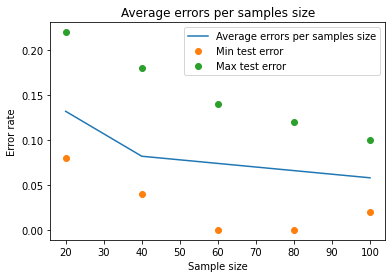

In [ ]:
data = np.load('mnist_all.npz')

train1 = data['train1']
train3 = data['train3']
train4 = data['train4']
train6 = data['train6']

test1 = data['test1']
test3 = data['test3']
test4 = data['test4']
test6 = data['test6']

errors_sum = 0
min_error = 1
max_error = 0
samples_size = []
errors = []
min_errors_list = []
max_errors_list = []

for size in range(20, 101, 20):
    for iteration in range(10):
        x_train, y_train = gensmallm([train1, train3, train4, train6], [1, 3, 4, 6], size)

        x_test, y_test = gensmallm([test1, test3, test4, test6], [1, 3, 4, 6], 50)

        classifer = learnknn(1, x_train, y_train)

        y_testpredict = predictknn(classifer, x_test)

        # tests to make sure the output is of the intended class and shape
        assert isinstance(y_testpredict,
                          np.ndarray), "The output of the function predictknn should be a numpy array"
        assert y_testpredict.shape[0] == x_test.shape[0] and y_testpredict.shape[
            1] == 1, f"The shape of the output should be ({x_test.shape[0]}, 1)"

        y_test = np.array([y_test]).transpose()
        mean_error = np.mean(y_test != y_testpredict)
        errors_sum += mean_error
        min_error = min(min_error, mean_error)
        max_error = max(max_error, mean_error)

    print("Progress: " + str(size) + "% Completed")
    samples_size.append(size)
    errors.append(errors_sum / 10)
    min_errors_list.append(min_error)
    max_errors_list.append(max_error)
    errors_sum = 0
    min_error = 1
    max_error = 0

plt.title("Average errors per samples size")
plt.plot(samples_size, errors, label='Average errors per samples size')
plt.plot(samples_size, min_errors_list, 'o', label='Min test error')
plt.plot(samples_size, max_errors_list, 'o', label='Max test error')
plt.xlabel('Sample size')
plt.ylabel('Error rate')
plt.legend()
plt.show()

# Test the KNN error as a function of k size

Progress: 9.0% Completed
Progress: 18.0% Completed
Progress: 27.0% Completed
Progress: 36.0% Completed
Progress: 45.0% Completed
Progress: 54.0% Completed
Progress: 63.0% Completed
Progress: 72.0% Completed
Progress: 81.0% Completed
Progress: 90.0% Completed
Progress: 100.0% Completed


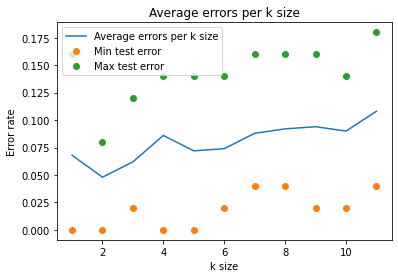

In [ ]:
data = np.load('mnist_all.npz')

train1 = data['train1']
train3 = data['train3']
train4 = data['train4']
train6 = data['train6']

test1 = data['test1']
test3 = data['test3']
test4 = data['test4']
test6 = data['test6']

errors_sum = 0
min_error = 1
max_error = 0
k_size = []
errors = []
min_errors_list = []
max_errors_list = []

for k in range(1, 12, 1):
    for iteration in range(10):
        x_train, y_train = gensmallm([train1, train3, train4, train6], [1, 3, 4, 6], 100)

        x_test, y_test = gensmallm([test1, test3, test4, test6], [1, 3, 4, 6], 50)

        classifer = learnknn(k, x_train, y_train)

        y_testpredict = predictknn(classifer, x_test)

        # tests to make sure the output is of the intended class and shape
        assert isinstance(y_testpredict,
                          np.ndarray), "The output of the function predictknn should be a numpy array"
        assert y_testpredict.shape[0] == x_test.shape[0] and y_testpredict.shape[
            1] == 1, f"The shape of the output should be ({x_test.shape[0]}, 1)"

        y_test = np.array([y_test]).transpose()
        mean_error = np.mean(y_test != y_testpredict)
        errors_sum += mean_error
        min_error = min(min_error, mean_error)
        max_error = max(max_error, mean_error)

    print("Progress: " + str(np.floor(k * 100 / 11)) + "% Completed")
    k_size.append(k)
    errors.append(errors_sum / 10)
    min_errors_list.append(min_error)
    max_errors_list.append(max_error)
    errors_sum = 0
    min_error = 1
    max_error = 0

plt.title("Average errors per k size")
plt.plot(k_size, errors, label='Average errors per k size')
plt.plot(k_size, min_errors_list, 'o', label='Min test error')
plt.plot(k_size, max_errors_list, 'o', label='Max test error')
plt.xlabel('k size')
plt.ylabel('Error rate')
plt.legend()
plt.show()

# Swapping 20% of the samples labels

In [ ]:
def labels_swapper(x_list: list, y_list: list, m: int):
    """
    label_swapper mislabel 20% of the data set

    :param x_list: a list of numpy arrays, one array for each one of the labels
    :param y_list: a list of the corresponding labels, in the same order as x_list
    :param m: the size of the sample
    :return: a tuple (X, y) where X contains the examples and y contains the labels
    """
    assert len(x_list) == len(y_list), 'The length of x_list and y_list should be equal'

    labels_set = {1.0, 3.0, 4.0, 6.0}
    twenty_percent = (m * 20) // 100
    for i in range(twenty_percent):
        current_label = np.array([y_list[i]]).astype(set)
        wrong_labels_set = labels_set - set(current_label)
        y_list[i] = random.sample(wrong_labels_set, 1)[0]

    return x_list, y_list

# Test the KNN error as a function of the sample size with 20% corrupted labels

Progress: 9.0% Completed
Progress: 18.0% Completed
Progress: 27.0% Completed
Progress: 36.0% Completed
Progress: 45.0% Completed
Progress: 54.0% Completed
Progress: 63.0% Completed
Progress: 72.0% Completed
Progress: 81.0% Completed
Progress: 90.0% Completed
Progress: 100.0% Completed


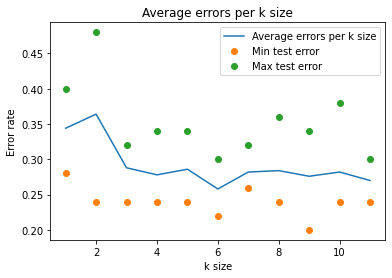

In [ ]:
data = np.load('mnist_all.npz')

train1 = data['train1']
train3 = data['train3']
train4 = data['train4']
train6 = data['train6']

test1 = data['test1']
test3 = data['test3']
test4 = data['test4']
test6 = data['test6']

errors_sum = 0
min_error = 1
max_error = 0
k_size = []
errors = []
min_errors_list = []
max_errors_list = []

for k in range(1, 12, 1):
    for iteration in range(10):
        x_train, y_train = gensmallm([train1, train3, train4, train6], [1, 3, 4, 6], 100)
        x_train, y_train = labels_swapper(x_train, y_train, 100)

        x_test, y_test = gensmallm([test1, test3, test4, test6], [1, 3, 4, 6], 50)
        x_test, y_test = labels_swapper(x_test, y_test, 50)

        classifer = learnknn(k, x_train, y_train)

        y_testpredict = predictknn(classifer, x_test)

        # tests to make sure the output is of the intended class and shape
        assert isinstance(y_testpredict,
                          np.ndarray), "The output of the function predictknn should be a numpy array"
        assert y_testpredict.shape[0] == x_test.shape[0] and y_testpredict.shape[
            1] == 1, f"The shape of the output should be ({x_test.shape[0]}, 1)"

        y_test = np.array([y_test]).transpose()
        mean_error = np.mean(y_test != y_testpredict)
        errors_sum += mean_error
        min_error = min(min_error, mean_error)
        max_error = max(max_error, mean_error)

    print("Progress: " + str(np.floor(k * 100 / 11)) + "% Completed")
    k_size.append(k)
    errors.append(errors_sum / 10)
    min_errors_list.append(min_error)
    max_errors_list.append(max_error)
    errors_sum = 0
    min_error = 1
    max_error = 0

plt.title("Average errors per k size")
plt.plot(k_size, errors, label='Average errors per k size')
plt.plot(k_size, min_errors_list, 'o', label='Min test error')
plt.plot(k_size, max_errors_list, 'o', label='Max test error')
plt.xlabel('k size')
plt.ylabel('Error rate')
plt.legend()
plt.show()